In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense ,Dropout, Bidirectional
from keras.optimizers import Nadam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from neural_network_functions import *

 	(n_samples, n_timesteps, n_features):
	•	n_samples — количество образцов (примеров).
	•	n_timesteps — количество временных шагов (или последовательных значений).
	•	n_features — количество признаков (фич) для каждого временного шага.

In [2]:
n_timesteps = 15
n_features = 1
n_forecast = 10

In [3]:
df = pd.read_csv('dataset_days.csv', sep=',', index_col="time")
df.head()

Среднняя t  Минимальная t  Максимальная t  Суточная сумма осадков  \
time                                                                            
2019-05-24        13.6            8.9            17.5                     0.0   
2019-05-25        15.6           11.8            18.9                     0.3   
2019-05-26        18.1           14.3            23.6                     0.0   
2019-05-27        16.7           12.5            21.2                     0.0   
2019-05-28        22.0           15.9            28.4                     0.0   

            Глубина снега  Скорость ветра  Среднее давление hPa  \
time                                                              
2019-05-24            0.0             4.7                1012.7   
2019-05-25            0.0             4.6                1010.2   
2019-05-26            0.0             2.4                1004.7   
2019-05-27            0.0             4.7                1008.5   
2019-05-28            0.0             2.9                1014.1   

            Относительная влажность в %  
time                                     
2019-05-24                       64.125  
2019-05-25                       56.625  
2019-05-26                       62.375  
2019-05-27                       52.500  
2019-05-28                       48.250

In [4]:
dfs = df.dropna(subset=["Среднняя t"])
dfs = dfs.reset_index(drop=True)
temp = dfs.iloc[:,:1].values

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
len(temp) 

1835

In [26]:
int((size / 100) * 60)

770

In [ ]:
size = len(temp)
target_idx = int((size / 100) * 60)

train = dataset[:target_idx]
test = dataset[target_idx:]

(1835, 1)

In [6]:
train, test, size = create_train_test_data(temp, 70)

In [ ]:
X, X_test, y, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=42)

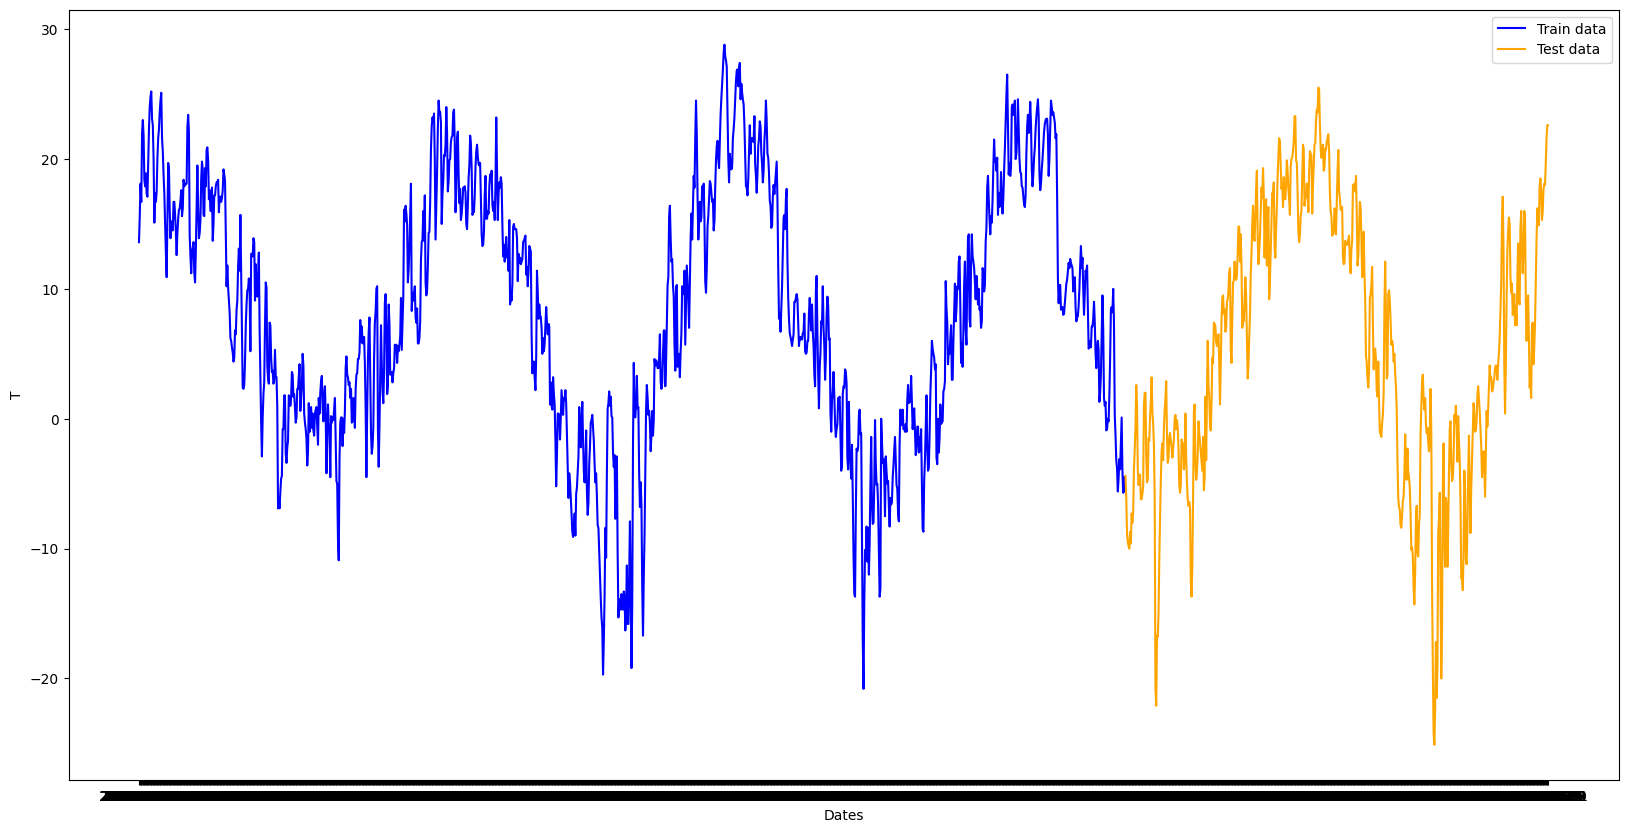

In [7]:
plt.figure(figsize=(20,10), dpi=100)
plt.xlabel('Dates')
plt.ylabel('T')
plt.plot(df.index[:size], train, 'blue', label='Train data')
plt.plot(df.index[size:], test, 'orange', label='Test data')
plt.legend()

In [8]:
train_scal = scaler.fit_transform(train)

In [9]:
x_train, y_train = create_data(train_scal, n_timesteps, n_forecast, n_features)

In [10]:
x_train.shape

(1260, 15, 1)

In [11]:
test_scal = scaler.transform(test)

In [12]:
test_scal.shape

(551, 1)

In [13]:
x_train, y_train = create_data(train_scal, n_timesteps, n_forecast, n_features)
x_test, y_test = create_data(test_scal, n_timesteps, n_forecast, n_features)
y_test = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]))
y_test = scaler.inverse_transform(y_test)

In [14]:
model = create_model(x_train=x_train,
                    n_forecast=n_forecast,
                    units=150,
                    n_features = n_features,
                    n_timesteps=n_timesteps)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 15, 300)        │       182,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 150)        │       270,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 15, 150)        │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 75)             │        67,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 10, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702,160 (2.68 MB)

 Trainable params: 702,160 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(x_train, y_train, epochs=250, batch_size=32)

Epoch 1/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1368 - mae: 0.2901
Epoch 2/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0276 - mae: 0.1302
Epoch 3/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0228 - mae: 0.1187
Epoch 4/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0223 - mae: 0.1180
Epoch 5/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0182 - mae: 0.1065
Epoch 6/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0181 - mae: 0.1063
Epoch 7/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0187 - mae: 0.1074
Epoch 8/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0164 - mae: 0.1012
Epoch 9/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0152 - mae: 0.0976
Epoch 10/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mae: 0.0939
Epoch 11/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0150 - mae: 0.0952
Epoch 12/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mae: 0.0954
Epoch 13/250
40/40 ━━━━━━

In [16]:
test_loss, test_mae = model.evaluate(x_test)

ValueError: None values not supported.

In [18]:
predict = model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [19]:
predict = np.reshape(predict, (predict.shape[0], predict.shape[1]))
predict = scaler.inverse_transform(predict)

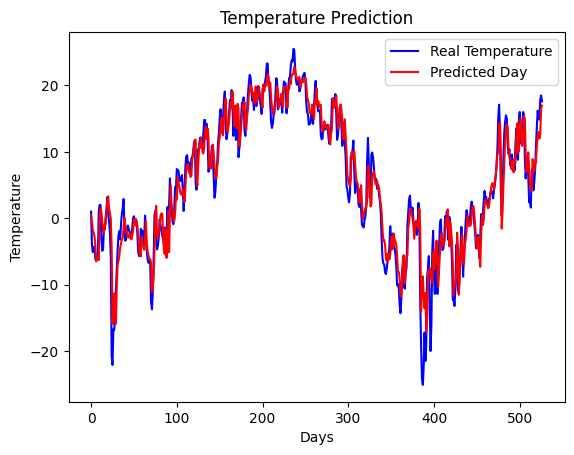

In [20]:
plt.plot(y_test[:, 0], color='blue', label='Real Temperature')

plt.plot(predict[:, 0], color='red', label=f'Predicted Day')

plt.title('Temperature Prediction')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [33]:
for i in range(n_forecast):
    mae_day = np.mean(np.abs(y_test[:, i] - predict[:, i]))
    print(f'MAE for Day {i+1}: {mae_day}')

MAE for Day 1: 2.424701902075923
MAE for Day 2: 3.2474917498560343
MAE for Day 3: 3.7207837864502107
MAE for Day 4: 3.9226476788577362
MAE for Day 5: 4.098286497893352
MAE for Day 6: 4.278685497391821
MAE for Day 7: 4.473470639670709
MAE for Day 8: 4.62329541189027
MAE for Day 9: 4.712887871514235
MAE for Day 10: 4.820527391540032
